In [ ]:
import os
if os.getcwd() == '/Users/george/Desktop/MLFG_Project/Notebooks':
    os.chdir('..')

In [62]:
import pandas as pd
import numpy as np
%config Completer.use_jedi = False

In [63]:
disease_map=pd.DataFrame( ['Zeller_fecal_colorectal_cancer',
                         'Quin_gut_liver_cirrhosis',
                         'metahit',
                         't2dmeta_long',
                         'WT2D',
                         'Chatelier_gut_obesity'], 
             ['Colorectal', 'Cirrhosis', 'IBD', 'C-T2D', 'EW-T2D', 'Obesity'] 
            ).reset_index()

disease_map.columns = ['clean', 'raw']

In [64]:
all_results=pd.concat( [pd.read_csv('results/baseline/'+a) for a in os.listdir('results/baseline') if a[-3:]=='csv'], axis=0)
all_results=all_results.merge(disease_map, left_on='Dataset', right_on='raw'
                 )[['Data Type', 'clean', 'Model Type', 'hyperparams','AUC']]
all_results.columns=['Data Type', 'Dataset', 'Model Type', 'Hyperparameters','AUC']                  
all_results=all_results.reset_index(drop=True)
all_results.head()

,Data Type,Dataset,Model Type,Hyperparameters,AUC
0,Marker,Colorectal,SAE,"[256, 'svm']",0.874074
1,Abundance,Colorectal,RF,"[700, 4, 'entropy']",0.637037
2,Abundance,Colorectal,SAE,"[256, 'rf']",0.707407
3,Abundance,Colorectal,SVM,"[1, -15]",0.229630
4,Abundance,Colorectal,FFNN,"[256, 256, 32, 0.1, 0.1]",0.700000


In [65]:
all_results

,Data Type,Dataset,Model Type,Hyperparameters,AUC
0,Marker,Colorectal,SAE,"[256, 'svm']",0.874074
1,Abundance,Colorectal,RF,"[700, 4, 'entropy']",0.637037
2,Abundance,Colorectal,SAE,"[256, 'rf']",0.707407
3,Abundance,Colorectal,SVM,"[1, -15]",0.229630
4,Abundance,Colorectal,FFNN,"[256, 256, 32, 0.1, 0.1]",0.700000
...,...,...,...,...,...
66,Marker,Obesity,SVM,"[1, 2]",0.626298
67,Abundance,Obesity,DAE,"[512, 128, 'rf']",0.665225
68,Abundance,Obesity,VAE,"[512, 16, 'svm']",0.596886
69,Marker,Obesity,VAE,"[64, 16, 'rf']",0.776817


In [66]:
all_results['Model Type'].value_counts()

SAE     12
RF      12
VAE     12
SVM     12
DAE     12
FFNN    11
Name: Model Type, dtype: int64

In [67]:
#all_results=all_results.loc[all_results['Model Type']!='FFNN']

In [68]:
all_results[['Data Type', 'Dataset', 'Model Type', 'Hyperparameters','AUC']].sort_values('AUC', 
    ascending=False).groupby(['Data Type', 'Dataset']).head(1).sort_values(['Data Type','Dataset'],
        ascending=False)

,Data Type,Dataset,Model Type,Hyperparameters,AUC
69,Marker,Obesity,VAE,"[64, 16, 'rf']",0.776817
35,Marker,IBD,FFNN,"[512, 128, 128, 0.01, 0.3]",0.941176
59,Marker,EW-T2D,FFNN,"[1024, 64, 64, 0.1, 0.1]",0.949495
5,Marker,Colorectal,DAE,"[256, 256, 'svm']",0.903704
23,Marker,Cirrhosis,FFNN,"[512, 256, 128, 0.1, 0.5]",0.963768
47,Marker,C-T2D,FFNN,"[512, 128, 32, 0.001, 0.3]",0.766387
62,Abundance,Obesity,SAE,"[128, 'svm']",0.733564
31,Abundance,IBD,DAE,"[1024, 32, 'svm']",0.647059
55,Abundance,EW-T2D,DAE,"[512, 512, 'svm']",0.696970
8,Abundance,Colorectal,VAE,"[64, 16, 'svm']",0.874074


a few thoughts:
- the RF model is doing the best on the abundance data. This is consistent with their resutls
- I have the deep FFNN doing the best on the marker data 4/6 times. This isn't the same as their output, as they didn't really look too deeply into ffnns. This suggests that for my project, I could potentially get more out of the FFNNs than the encoders when it comes to transfer learning.... could be wrong, but shouldn't be surprised if the final results call for FFNNs to be the main focus. FFNNs had a particularly large improvement for the marker CRC dataset. 

- generally, the aucs I have are within DeepMicro's uncertainty range. It's possible they were a little more stringent with how they defined a disease from the tables. 
- My FFNN is doing much better than their MLP model. This could be due to differences in design.
- biggest difference in results is from the CRC data. They seem to get much worse results because they consider adenomas to be negative, while I treat it as positive. Given that it makes the results much better, there is value in this. Furthermore, from a CRC screening perspective, the detection of adenomas in the colon can often classify patients as 'high risk', and it often should warrant a colonoscopy (or at least a visit to a GE). 

In [69]:
def plot_fig2_summary(data, 
                      axis,
                      dataset,
                      data_type, 
                      i
                      ):
    

    df = data.loc[( data['Dataset']==dataset)&(
                    data['Data Type']==data_type)]
    
    df=df.sort_values('Model Type', axis=0)
    sns.barplot(x='Model Type', 
                y='AUC', 
                data=df, 
                ax=axis)
    #axis.get_legend().remove()
    axis.set_title(dataset, size=20)
    axis.set_ylim(0, 1.03)
    axis.set_xlabel(None)
    if i in [0,3]:
        axis.set_ylabel('AUC')
    else:
        axis.set_ylabel(None)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(font_scale = 1.5)

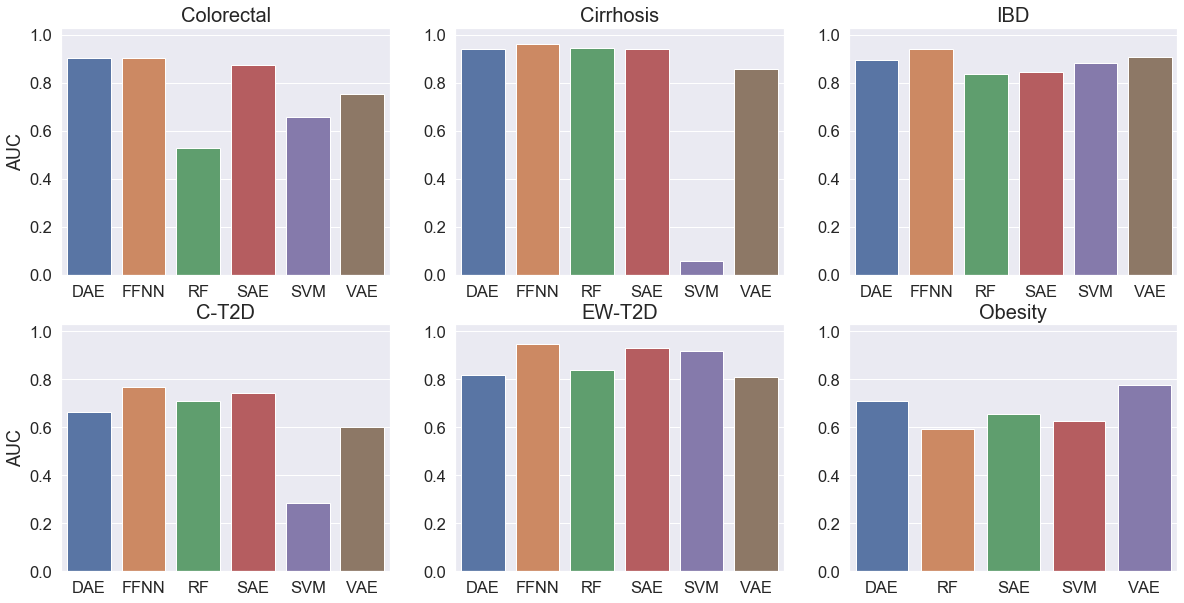

In [71]:
# making some plots like those shown in the paper

datasets=list(all_results.Dataset.unique())
fig, ax = plt.subplots(2, 3, figsize = (20, 10)) 
[plot_fig2_summary(all_results, a, d, 'Marker', i)\
  for i, (d, a) in enumerate( zip(datasets, ax.flatten()[:7]))]
#plt.suptitle('Summary of Marker Dataset Results', size=30)
plt.savefig('figures/marker_results.png')
plt.show()

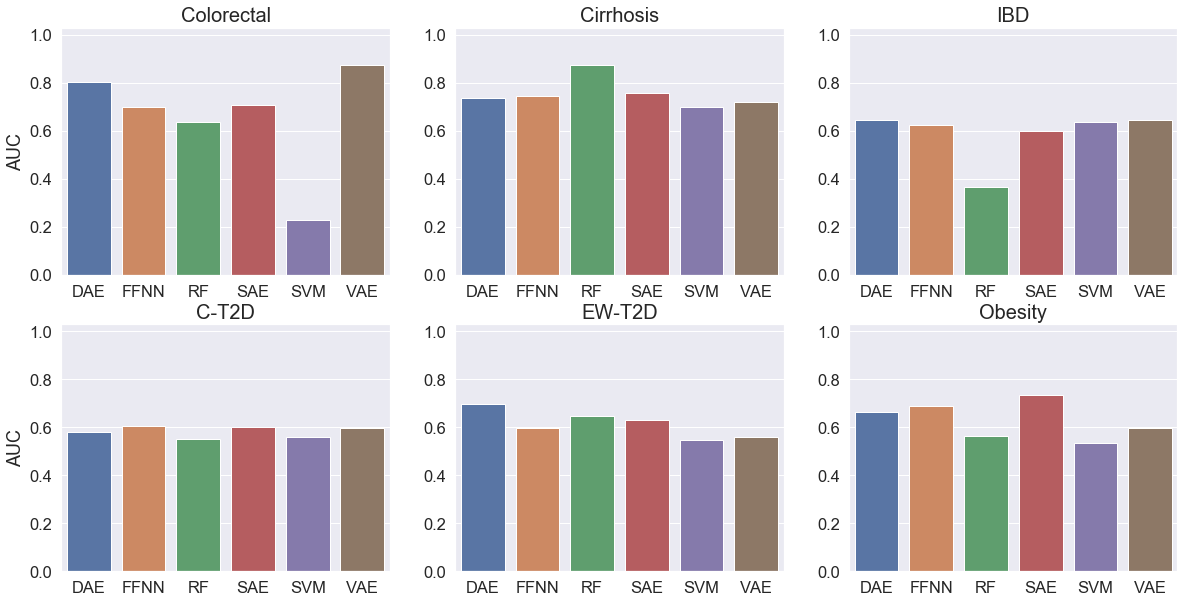

In [72]:
datasets=list(all_results.Dataset.unique())
fig, ax = plt.subplots(2, 3, figsize = (20, 10)) 
[plot_fig2_summary(all_results, a, d, 'Abundance', i)\
  for i, (d, a) in enumerate( zip(datasets, ax.flatten()[:7]) )]
# plt.suptitle('Summary of Abundance Dataset Results', size=30)
plt.savefig('figures/abundance_results.png')
plt.show()

## Making Result Plots for Parameter Sharing 

In [97]:
shared_results=pd.concat( [pd.read_csv('results/sharing_results/'+a) for a in os.listdir('results/sharing_results/') if a[-3:]=='csv'], axis=0)
maml_results=pd.concat( [pd.read_csv('results/MAML_results/'+a) for a in os.listdir('results/MAML_results/') if a[-3:]=='csv'], axis=0)

In [169]:
shared_results['Training Type'] = 'Parameter Sharing'
all_results['Training Type'] = 'Standard'
maml_results['Training Type'] = 'Metalearning'
maml_results['Model Type'] = 'MAML FFNN'

combined = pd.concat( [ shared_results.groupby(['Data Type', 'Dataset', 'Model Type', 'Training Type'])['AUC'].max().to_frame().reset_index(),
            all_results[['Data Type', 'Dataset', 'Model Type', 'Training Type', 'AUC']],
                maml_results.groupby(['Data Type', 'Dataset', 'Model Type', 'Training Type'])['AUC'].max().to_frame().reset_index()
           ], axis = 0
            ).reset_index(drop=True)

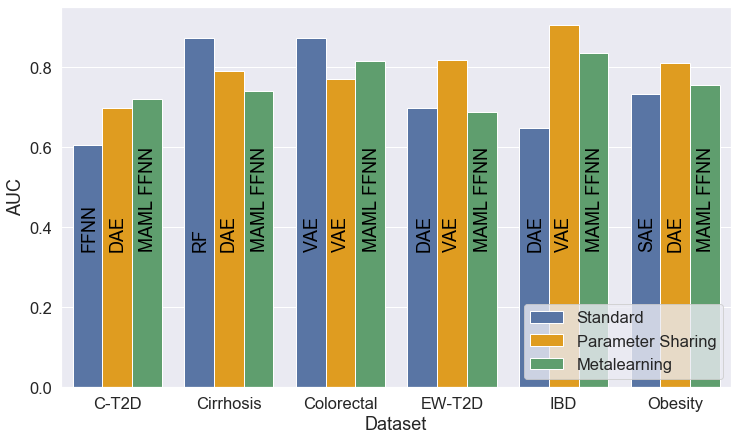

In [210]:
fig = plt.figure(figsize = (12,7))

plot_data = combined.loc[combined['Data Type']=='Abundance']\
            .sort_values('AUC', axis = 0).groupby(['Data Type', 'Dataset', 'Training Type']).tail(1)\
           .sort_values('Dataset')
g = sns.barplot(x = 'Dataset', y = 'AUC', hue = 'Training Type', 
            data = plot_data, palette = {'Standard':'b', 'Parameter Sharing':'orange','Metalearning':'g'})
            #combined.loc[(combined['Model Type']=='SAE')&(combined['Data Type']=='Abundance')] )
# sns.boxplot(x = 'Dataset', y = 'AUC', hue = 'Training Type', 
#             data = combined.loc[combined['Data Type']=='Abundance'])

types = plot_data.sort_values(['Dataset','Training Type'], ascending=[True,False])['Model Type'].values
# for i,p in enumerate( splot.patches ):
#     splot.annotate(types[i], 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    size=15,
#                    xytext = (0, -12), 
#                    textcoords = 'offset points')
    
for i, (index, row) in enumerate( plot_data.iterrows() ):
    p = i + i//3
    g.text((p-1)/4  + (i%3==2)*.03,
           .35, types[i], color='black', ha="center", rotation = 90)

plt.legend(loc = 'lower right')
plt.title("Best Observed AUC for Each Training Type", size=20)
# plt.savefig('figures/Best_AUCS.png')
plt.show()

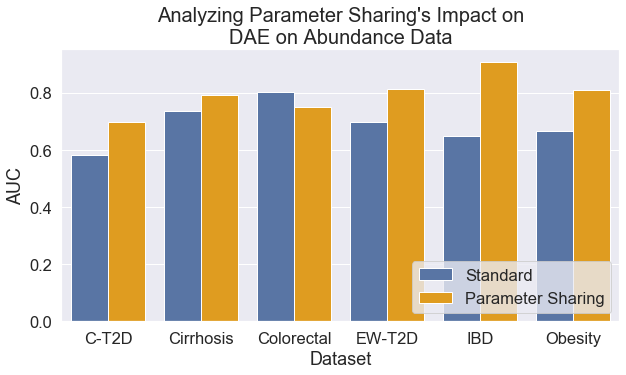

In [212]:
fig = plt.figure(figsize = (10,5))

sns.barplot(x = 'Dataset', y = 'AUC', hue = 'Training Type', 
#             data = combined.loc[combined['Data Type']=='Abundance'])
            data = combined.sort_values(['Dataset', 'Training Type'], ascending=[True, False])\
                .loc[(combined['Model Type']=='DAE')&(combined['Data Type']=='Abundance')],
           palette = {'Standard':'b', 'Parameter Sharing':'orange','Metalearning':'g'})
# sns.boxplot(x = 'Dataset', y = 'AUC', hue = 'Training Type', 
#             data = combined.loc[combined['Data Type']=='Abundance'])
plt.legend(loc = 'lower right')
plt.title("Analyzing Parameter Sharing's Impact on\nDAE on Abundance Data", size=20)
# plt.savefig('figures/sharing_DAE.png')
plt.show()

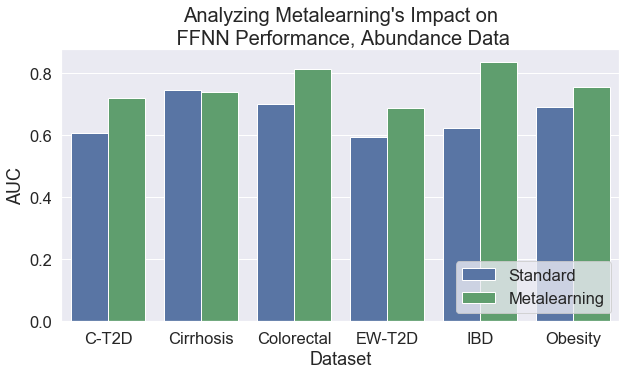

In [214]:
fig = plt.figure(figsize = (10,5))

sns.barplot(x = 'Dataset', y = 'AUC', hue = 'Training Type', 
#             data = combined.loc[combined['Data Type']=='Abundance'])
            data = combined.sort_values(['Dataset', 'Training Type'], ascending=[True, False])\
                .loc[(combined['Model Type'].str.contains('FFNN'))&(combined['Data Type']=='Abundance')], 
           palette = {'Standard':'b', 'Parameter Sharing':'o','Metalearning':'g'}
           )
# sns.boxplot(x = 'Dataset', y = 'AUC', hue = 'Training Type', 
#             data = combined.loc[combined['Data Type']=='Abundance'])
plt.legend(loc = 'lower right')
plt.title("Analyzing Metalearning's Impact on\n FFNN Performance, Abundance Data", size=20)
# plt.savefig('figures/Metalearning_Comparison.png')
plt.show()

## Making Visualizations for the Supplementary Figures section

In [31]:
import sys
sys.path.append('learn2learn')
import pandas as pd

In [3]:
from baseline import hyperparams
from Metalearning.MAML import MAML_FFNN_parameters

In [5]:

params = [hyperparams.rf_parameters,
        hyperparams.svm_parameters,
        hyperparams.FFNN_parameters,
        hyperparams.DAE_parameters,
        hyperparams.SAE_parameters,
        hyperparams.VAE_parameters,
        MAML_FFNN_parameters,
         ]


In [30]:
Model_names = ['Random Forest', 'SVM', 'FFNN', 'DAE', 'SAE', 'VAE', 'MAML_FFNN']

In [33]:
search_space = pd.DataFrame( {'Model Structure':Model_names,
               'Hyperparameters Tuned':[[b['name'] for b in a] for a in params], 
               'Values Considered':[[b['values'] 
  if 'values' in b.keys() else b['bounds'] + ['(Considered the range using bayesian optimization)']
  for b in a ] for a in params]
               })

In [50]:
full_space = search_space[['Model Structure']].merge( pd.concat( [search_space['Hyperparameters Tuned'].explode(), 
                                          search_space['Values Considered'].explode()], axis=1), 
                                      left_index=True, right_index=True ).reset_index(drop=True)
full_space.index = full_space['Model Structure']
full_space = full_space.drop('Model Structure', axis=1)



In [60]:
full_space

,Hyperparameters Tuned,Values Considered
Model Structure,,
Random Forest,n_estimators,"[100, 300, 500, 700, 900]"
Random Forest,min_samples_leaf,"[1, 2, 3, 4, 5]"
Random Forest,criterion,"[gini, entropy]"
SVM,C,"[-5, -3, -1, 1, 3, 5]"
SVM,gamma,"[-15, -13, -11, -9, -7, -5, -3, -1, 2, 23]"
FFNN,layer_1_size,"[128, 256, 512, 1024]"
FFNN,layer_2_size,"[256, 128, 64]"
FFNN,layer_3_size,"[128, 64, 32]"
FFNN,learning_rate,"[0.001, 0.01, 0.1]"


In [84]:
groups = {'ALL': [ ['Obesity', 'IBD', 'Colorectal', 'EW-T2D', 'C-T2D', 'Cirrhosis'] ],
          'EU': [ ['Obesity', 'IBD', 'Colorectal', 'EW-T2D'] ],
          'CH':[ ['C-T2D', 'Cirrhosis'] ], 
          'T2D':[ ['EW-T2D','C-T2D'] ],
          'Colon':[ ['IBD', 'Colorectal'] ]
        }
     
group_df = pd.DataFrame(groups).T
group_df.columns=['Datasets in Group']

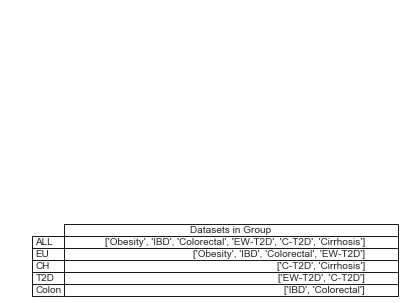

In [96]:
# fig = plt.figure(figsize=(12,7))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table( ax, group_df )